In [3]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# loc_P04 = '/home/saumya/Documents/Rajesh_sir_Dip/Schlieren-Data/P04/'
loc_P04 = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/P04/'

In [5]:
data = np.load(loc_P04+'P04.npy')

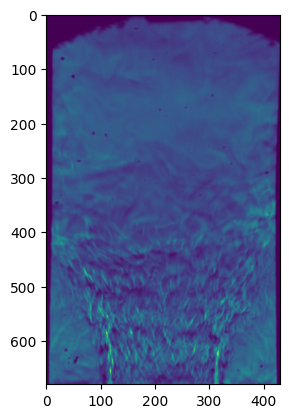

In [45]:
plt.imshow(data[55][270:950, 290:720])

In [68]:
from PIL import Image
t = 270
b = 950
l = 290
r = 720


for i in range(data.shape[0]):


806

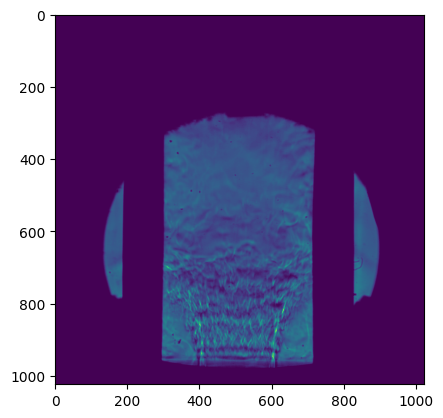

In [66]:
cropped_data = data[:][280:950]
plt.imshow(cropped_data[0])

In [62]:
cropped_data.shape

(680, 1024)

In [56]:
# plt.imshow(cropped_data)

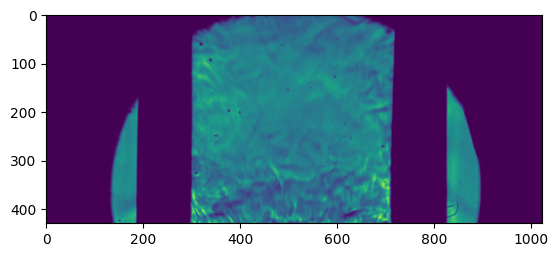

In [42]:
plt.imshow(cropped_data[0])

In [32]:
for i in range
patches = patchify.patchify(cropped_data[0], (9, 9), 9)

In [30]:
patches[40][49]

array([[44, 46, 45, 45, 46, 43, 40, 39, 38],
       [47, 47, 44, 43, 42, 42, 41, 39, 39],
       [44, 46, 48, 45, 43, 40, 40, 36, 36],
       [44, 46, 46, 39, 42, 40, 36, 38, 37],
       [45, 45, 44, 42, 41, 37, 38, 36, 36],
       [46, 43, 41, 44, 36, 38, 35, 36, 36],
       [46, 44, 40, 43, 39, 38, 34, 33, 32],
       [45, 40, 39, 38, 35, 34, 31, 31, 33],
       [43, 41, 39, 37, 37, 35, 35, 32, 34]], dtype=uint8)